In [3]:
pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git
#!python -m spacy download es

SyntaxError: ignored

In [10]:
!python -m spacy download es

     |████████████████████████████████| 11.1MB 3.9MB/s 
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.1.0-cp36-none-any.whl size=11111556 sha256=69a21ca62df13512cf574a0c485c1c287f98dac75d61376c167efba4c82745d7
  Stored in directory: /tmp/pip-ephem-wheel-cache-flut1y0_/wheels/cc/ee/c4/68922955901918a9aaa82e828d4f7ee1ccfc861285277e79b7
Successfully built es-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/es_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/es
You can now load the model via spacy.load('es')


In [0]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip

#This will be doing most of the work
import networkx as nx

import sklearn #For generating some matrices
import pandas as pd #For DataFrames
import numpy as np #For arrays
import matplotlib.pyplot as plt #For plotting
import seaborn #Makes the plots look nice
import scipy #Some stats
import nltk #a little language code
from IPython.display import Image #for pics

import pickle #if you want to save layouts
import os

from os import listdir
from os.path import isfile, join

# comp-linguistics
import spacy
import nltk
from spacy import displacy
#Using NLP in spanish
nlp = spacy.load("es")

%matplotlib inline

In [0]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g

In [8]:
text_folder = '/content/txt'
text_dic = {}
onlyfiles = [f for f in listdir(text_folder) if isfile(join(text_folder, f))]

for file in onlyfiles:
    f = open(text_folder + '/' + file, "r")
    text_dic[file] = {}
    text_dic[file]['name'] = file
    text_dic[file]['text'] = f.read()
    
#Using the modified version of clean_raw_text function, incorporating it into my own code, we build 
#the lists of tokenized texts for every speech
for index, data in text_dic.items():
    text_dic[index]['clean_text'] = text_dic[index]['text'].replace(" \'m", "'m") \
        .replace(" \'ll", "'ll").replace(" \'re", "'re") \
        .replace(" \'s", "'s").replace(" \'re", "'re")\
        .replace("\n", "").replace("\x0c", "")
    text_dic[index]['token_word_list'] = word_tokenize(text_dic[index]['clean_text'])

NameError: ignored

In [0]:
df_text = pd.DataFrame(text_dic)
df_text = df_text.T 

In [0]:
df_text['tokenized_sents'] = df_text['clean_text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
df_text['normalized_sents'] = df_text['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])

In [0]:
g = wordCooccurrence(df_text['normalized_sents'][:100].sum())

In [15]:
len(g.nodes)

13467

In [16]:
len(g.edges)

220252

In [17]:
nx.to_numpy_matrix(g)[:10, :10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [0]:
def tokenize(text):
    tokenlist = lucem_illud_2020.word_tokenize(text)
    normalized = lucem_illud_2020.normalizeTokens(tokenlist)
    return normalized
import sklearn.feature_extraction



In [0]:
senVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
senVects_incidence = senVectorizer.fit_transform(df_text['text'][:100])

In [20]:
senVects_incidence.shape

(19, 12384)

In [0]:
g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((senVectorizer.get_feature_names()[i] for i in range(senVects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(senVects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, senVectorizer.get_feature_names()[w], {'weight' : senVects_incidence[d, w]}) for d, w in zip(*senVects_incidence.nonzero())))

In [22]:
print(nx.info(g_2mode))

Name: 
Type: Graph
Number of nodes: 12403
Number of edges: 40525
Average degree:   6.5347


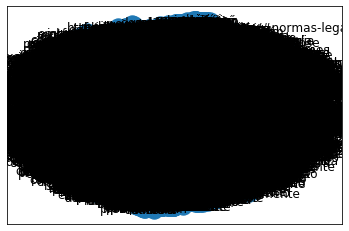

In [23]:
nx.draw_networkx(g_2mode)

In [0]:
def contractNetwork(g, targetType):
    g_mono = nx.Graph()
    g_mono.add_nodes_from(((n, d) for n, d in g_2mode.nodes(data = True) if d['bipartite'] == targetType))
    
    for n_outside in (n for n, d in g_2mode.nodes(data = True) if d['bipartite'] != targetType):
        neighbors = list((n for n in g.neighbors(n_outside) if g.nodes[n]['bipartite'] == targetType))
        for i, n1 in enumerate(neighbors):
            for n2 in neighbors[i+1:]:
                try:
                    g_mono.edges[n1, n2]['weight'] += 1
                except KeyError:
                    g_mono.add_edge(n1, n2, weight = 1)
    return g_mono

In [0]:
gDoc = contractNetwork(g_2mode, 'doc')

In [26]:
print(nx.info(gDoc))

Name: 
Type: Graph
Number of nodes: 19
Number of edges: 171
Average degree:  18.0000


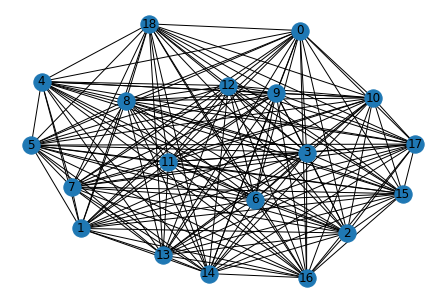

In [27]:
layout = nx.spring_layout(gDoc, k = 1/3, weight='weight', iterations= 50)
nx.draw(gDoc, pos = layout, labels = {n:n for n in gDoc.nodes()}) #Getting labels is a bit annoying

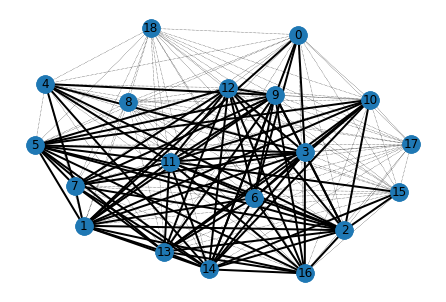

In [28]:
wMedian = np.median([d['weight'] for n1, n2, d in gDoc.edges(data = True)])
edgesHigh = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] > wMedian]
edgesLow = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] <= wMedian]
nx.draw(gDoc, pos = layout, labels = {n:n for n in gDoc.nodes()}, edgelist = edgesLow, style='dotted', width=.5)
nx.draw(gDoc, pos = layout, nodelist=None, edgelist = edgesHigh, width=2)

In [30]:
print(len(df_text.iloc[18]['text']),"words:","\n",df_text.iloc[18]['text'].strip().replace('  ', '\n'))

19779 words: 
 MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PERÚ, 

PEDRO PABLO KUCZYNSKI GODARD, 

ANTE EL CONGRESO NACIONAL, EL 28 DE JULIO DE 20161 

 
 
Muy buenos días a todos. 
Señora Presidenta del Congreso; 
Excelentísimos Jefes de Estado que nos acompañan hoy; 
Vicepresidentes de países que han venido; 
Embajadores, Congresistas y autoridades constitucionales; 
Cardenal, Majestad; 
 
Conciudadanos:

 
Me presento ante el país, según el mandato de nuestra Constitución, no a rendir 
cuenta,
como
haré
en
los
siguientes
años,
sino
a
inaugurar
el
mandato
que 
ustedes me han encomendado. Tengo, pues, un mensaje lleno de esperanza.

 
Debo agradecer a todos y todas, a los que votaron por mí en la primera vuelta 
electoral y a los que se unieron a nuestra propuesta en la segunda; pero también 
a los que no votaron por nosotros; a todos los que están representados en este 
Parlamento, símbolo de la democracia.

 
Quiero asegurar a todos y todas mi agradecimiento y compromiso para que el 


In [52]:
print(len(df_text.iloc[6]['text']),"words:","\n",df_text.iloc[6]['text'].strip().replace('  ', '\n'))

59692 words: 
 MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PERÚ,

 DOCTOR ALEJANDRO TOLEDO MANRIQUE,

ANTE EL CONGRESO NACIONAL, EL 28 DE JULIO DE 2002

Señor Presidente del Congreso de la República;
Señores Vicepresidentes del Congreso de la República;
Señores ex miembros de la Mesa Directiva de este Congreso;
Señor Ex Presidente de la República, Valentín Paniagua;
Señor Ex Presidente de la República, Francisco Morales Bermúdez;
Señor Presidente del Consejo de Ministros;
Señores Ministros de Estado;
Señores Presidentes de los Poderes Públicos;
Señores representantes del Cuerpo Diplomático;
Señores miembros de las Fuerzas Armadas del Perú;
Damas y caballeros Congresistas;
Señoras y señores:

Peruanas y peruanos:

Vengo
a
este
soberano
Congreso
de
la
República

a
rendir
cuentas
ante
nuestro pueblo de un año de gestión gubernamental.

No
se
trata
sólo
del
cumplimiento
de
una
formalidad.
He
venido
como
ciudadano de un país democrático, a dar cuenta de mis actos, a compartir con
ustedes
nues

In [34]:
gWord = contractNetwork(g_2mode, 'word')
print(nx.info(gWord))

Name: 
Type: Graph
Number of nodes: 12384
Number of edges: 26049907
Average degree: 4207.0263


In [35]:
wMean = np.mean([d['weight'] for n1, n2, d in gWord.edges(data = True)])
wMean

1.7476946078924582

In [0]:
g = wordCooccurrence(df_text['normalized_sents'][:100].sum())

In [38]:
len(g)

13467

In [0]:
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 25])

In [0]:
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first

In [0]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [42]:
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

Name: 
Type: Graph
Number of nodes: 451
Number of edges: 1609
Average degree:   7.1353


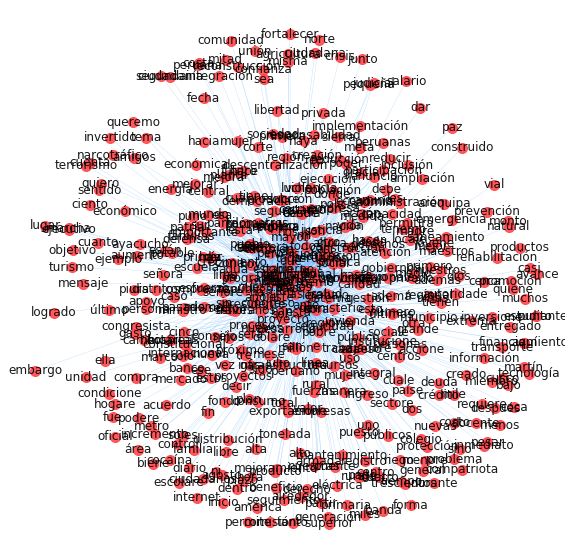

In [43]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [0]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(giant))

In [45]:
c

[frozenset({'acceso',
            'accione',
            'acción',
            'acuerdo',
            'ademá',
            'además',
            'administración',
            'agosto',
            'agricultura',
            'agua',
            'ahora',
            'al',
            'alrededor',
            'alta',
            'alto',
            'amigos',
            'ampliación',
            'américa',
            'ante',
            'anuncio',
            'apoyo',
            'aquí',
            'arequipa',
            'armada',
            'así',
            'atención',
            'aumento',
            'autoridade',
            'avance',
            'ayacucho',
            'año',
            'años',
            'bajo',
            'banco',
            'banda',
            'beneficio',
            'biene',
            'cada',
            'calidad',
            'cambio',
            'camino',
            'capacidad',
            'carretera',
            'casi',
            'caso',
 

In [0]:
giant = nx.Graph(giant)

In [47]:
giant.remove_nodes_from([n for n in giant.nodes if len(set(giant.neighbors(n))) >= 2000]) 
giant.remove_nodes_from(list(nx.isolates(giant)))
print(nx.info(giant))

Name: 
Type: Graph
Number of nodes: 451
Number of edges: 1609
Average degree:   7.1353


In [1]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

NameError: ignored

In [0]:
americanNeighbors = gWord.neighbors('emergencia')
americanNeighborsPlus1 = set(americanNeighbors)
for n in americanNeighbors:
    americanNeighborsPlus1 |= set(giant.neighbors(n))
    
#for x in americanNeighborsPlus1:
#    print(x)

In [50]:
g_american2 = giant.subgraph(americanNeighborsPlus1)
print(nx.info(g_american2))

Name: 
Type: Graph
Number of nodes: 450
Number of edges: 1608
Average degree:   7.1467


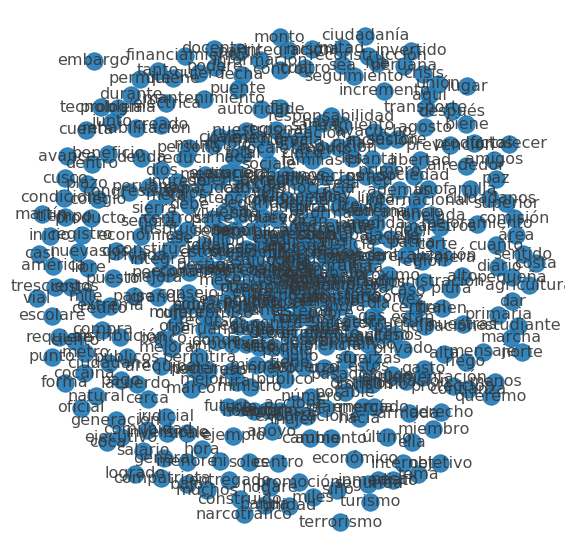

In [51]:
layout_amer = nx.spring_layout(g_american2, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
centralities_amer = nx.eigenvector_centrality(g_american2)
maxC = max(centralities_amer.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in g_american2.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_american2.edges(data = True)))
nx.draw(g_american2, ax = ax, pos = layout_amer, labels = {n:n for n in g_american2.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_american2.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma')) 